In [2]:
#!pip install bing-image-downloader
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *
import os

#diction = 'object'
# query_string = 'towel'

In [4]:
from bing_image_downloader import downloader
# downloader.download(query_string, limit=100,  output_dir=diction, adult_filter_off=True, force_replace=False, timeout=60)

In [5]:
# dest = 'object/test/towel/Image_1.jpg'

In [6]:
# im = Image.open(dest)
# im.to_thumb(128,128)

In [7]:
# dest = []
# for i in range(1,4):
#     dest.append('object/test/towel/Image_'+str(i)+'.jpg')
#     print(dest)
#     #im = Image.open(dest)
#     #im.to_thumb(128,128)

In [8]:
# for o in dest:
#     im = Image.open(o)
#     im.to_thumb(128,128)

In [9]:
# im = Image.open(dest[1])
# im.to_thumb(128,128)

In [10]:
items = 'towel', 'blanket'

In [11]:
path = Path('object')

In [57]:
fns = get_image_files(path)
fns

(#577) [Path('object/blanket/Image_199.jpg'),Path('object/blanket/Image_156.jpg'),Path('object/blanket/Image_19.jpg'),Path('object/blanket/Image_60.jpg'),Path('object/blanket/Image_229.jpg'),Path('object/blanket/Image_263.jpg'),Path('object/blanket/Image_264.jpg'),Path('object/blanket/Image_292.jpg'),Path('object/blanket/Image_209.jpg'),Path('object/blanket/Image_110.jpg')...]

In [77]:
for i in items:
    #dest = (path/i)
    dest = (path)
    #dest.mkdir(exist_ok=true)
    downloader.download(i, limit=300,  output_dir=dest, adult_filter_off=True, force_replace=False, timeout=60)
    #i is the name of the item (e.g. towel), i specify the pic topic to be collected



[!!]Indexing page: 1

[%] Indexed 151 Images on Page 1.


[%] Downloading Image #1 from https://www.rentmetoday.org/blog/wp-content/uploads/2017/07/towel9_orig.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images.hayneedle.com/mgen/master:HCIN1100.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://bestmicrofibercleaning.com/wp-content/uploads/2015/04/309005_Hand_Towel_latte.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.amara.com/static/uploads/images-2/products/x/huge/887675/london-towel-ocean-bath-towel-356501.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://bestmicrofibercleaning.com/wp-content/uploads/2015/04/309004_Bath_Towel_teal_large.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn11.bigcommerce.com/s-nkcv235d/images/stencil/1280x1280/products/20190/36807/bath_towel_fuchsia_1_1__31315.1460943915.jpg?c=2
[%] File Downloaded !

[%] Downloading Image #7 from https://www.pillowtalk.com.au/me

In [118]:
failed = verify_images(fns)
failed
#to identify and delete bad datas
listOfPic = []
for i in range(1,301):
    listOfPic.append("Image_"+str(i)+".jpg")
    
print(path)

# for i in listOfPic:
#     print(i)

object


In [119]:
failed.map(Path.unlink);

counter = 0

# for pic in listOfPic:
#     picPth = (path/'towel'/pic)
    
#     if picPth.exists():
#         old_file = os.path.join(path/'towel', pic)
#         new_file = os.path.join(path/'towel', str(counter)+'.jpg')
#         os.rename(old_file, new_file)
#         counter +=1

FileNotFoundError: [Errno 2] No such file or directory: 'object/blanket/Image_199.jpg'

In [147]:
objects = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # putting away 20% of the data for testing purposes
    get_y=parent_label,
    item_tfms=Resize(128))

In [148]:
dls = objects.dataloaders(path)

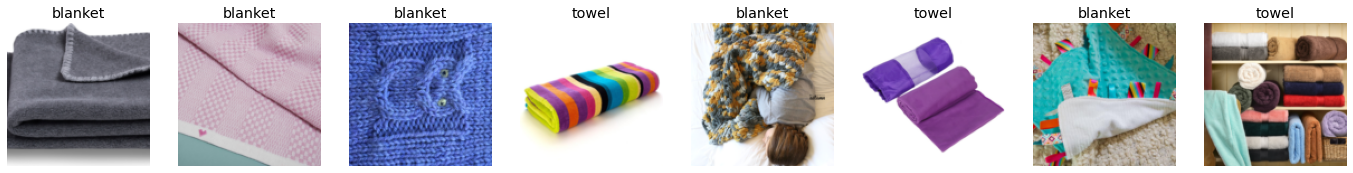

In [149]:
dls.valid.show_batch(max_n=8, nrows=1)

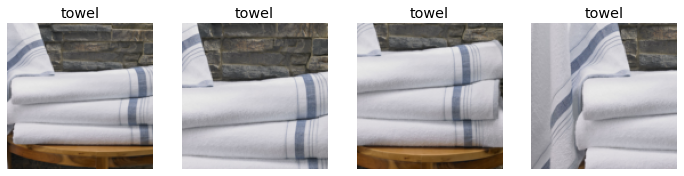

In [150]:
# objects = objects.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = objects.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)
# # to resize the data & generate data with diffrent perspective/ brightness/ ect
objects = objects.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = objects.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [151]:
objects = objects.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = objects.dataloaders(path)

In [152]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.974579,1.054719,0.392157,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.552181,0.487448,0.294118,00:08
1,0.432991,0.480258,0.186275,00:08
2,0.332614,0.265062,0.147059,00:08
3,0.282457,0.209382,0.088235,00:08


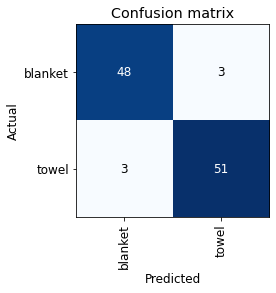

In [139]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

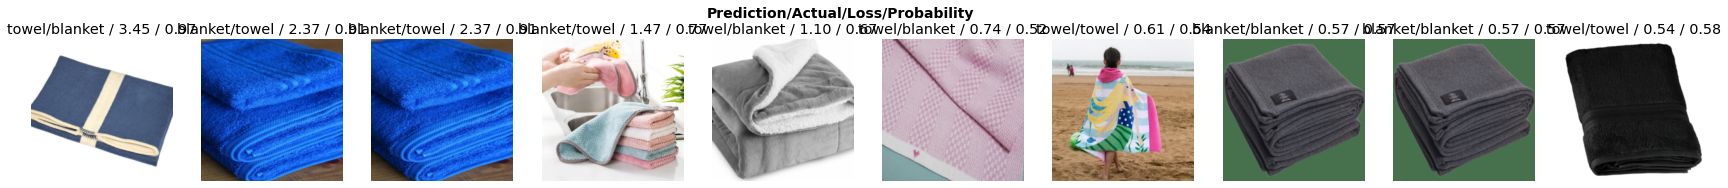

In [140]:
interp.plot_top_losses(10,nrows=1)
# showing the datas which it was least confidence about, to clean the data

In [154]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [96]:
print(path/cat)

object/blanket


In [156]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)